In [2]:
import numpy as np 
import pandas as pd
from sklearn import tree, ensemble, linear_model, naive_bayes, metrics, preprocessing, neural_network
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [3]:
Stroke_Data = pd.read_csv('C:/Users/seths/Desktop/healthcare-dataset-stroke-data.csv')

# Alot of models in python require that the data be numerical so the dummy variables
# change the categorical variables to binary values for each category 
Stroke_Data = pd.get_dummies(Stroke_Data)
Stroke_Data = Stroke_Data.drop(columns=["id"])



# Preprocessing the data except the stroke column to standardize the columns. This will help the data be more accurate     
#and not have issues due to the different scaling of features.  
X = Stroke_Data.drop(columns=["stroke"])
Y = Stroke_Data[["stroke"]] #sets the target attribute to BMI

scaled_features = preprocessing.StandardScaler().fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
Stroke_Data = pd.concat([X,Y], axis = 1).reset_index()




In [4]:
Stroke_Data

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,1.051434,-0.328602,4.185032,2.706375,0.981345,-1.189510,1.189990,-0.01399,-0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313,1
1,1,0.786070,-0.328602,-0.238947,2.121559,NaN,0.840682,-0.840343,-0.01399,-0.723884,...,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,1
2,2,1.626390,-0.328602,4.185032,-0.005028,0.459269,-1.189510,1.189990,-0.01399,-0.723884,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,1
3,3,0.255342,-0.328602,-0.238947,1.437358,0.701207,0.840682,-0.840343,-0.01399,-0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204,1
4,4,1.582163,3.043196,-0.238947,1.501184,-0.623083,0.840682,-0.840343,-0.01399,-0.723884,...,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,1.626390,3.043196,-0.238947,-0.494658,NaN,0.840682,-0.840343,-0.01399,-0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,-0.427313,0
5106,5106,1.670617,-0.328602,-0.238947,0.420775,1.414286,0.840682,-0.840343,-0.01399,-0.723884,...,-1.157010,2.288955,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,-0.427313,0
5107,5107,-0.363842,-0.328602,-0.238947,-0.511443,0.217332,0.840682,-0.840343,-0.01399,-0.723884,...,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,0
5108,5108,0.343796,-0.328602,-0.238947,1.328257,-0.419346,-1.189510,1.189990,-0.01399,-0.723884,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,2.184951,-0.766774,-0.427313,0


# Predicting the Null Values of the BMI feature

The BMI feature has null values for 4% of the dataset examples. There are three methods in order to account for this:  
- Remove the BMI feature from modeling. 
- Predicting what the BMI features could be. 
<br> <br> We will be testing both but below is the steps to predict the data via linear regression. 

In [5]:
Stroke_Data_2 = pd.read_csv('C:/Users/seths/Desktop/healthcare-dataset-stroke-data.csv')

BMI_Not_Null = Stroke_Data_2[Stroke_Data_2.bmi.notnull()]
BMI_Null = Stroke_Data_2[Stroke_Data_2.bmi.isnull()]

(sum(BMI_Null['stroke'])/len(BMI_Null['stroke'])) / (sum(BMI_Not_Null['stroke'])/len(BMI_Not_Null['stroke'])) 

4.674236473136709

In [6]:
print("BMI Null Values:", len(Stroke_Data[Stroke_Data.bmi.isnull()]))
Percent_Traffic = 100 * len(Stroke_Data[Stroke_Data.bmi.isnull()])/len(Stroke_Data)
print("Percent of Instances: %4.2f" % Percent_Traffic)

#shows that 4% or 156 examples have no data for BMI 

BMI Null Values: 201
Percent of Instances: 3.93


In [7]:
# Predict the BMI value for the NAN values

#Separate out the null rows from the rest of the dataset 
BMI_Not_Null = Stroke_Data[Stroke_Data.bmi.notnull()]
BMI_Null = Stroke_Data[Stroke_Data.bmi.isnull()]

X = BMI_Not_Null.drop(columns=["stroke", "bmi"])
Y = BMI_Not_Null["bmi"] #sets the target attribute to BMI 


In [8]:
#Run the regression model and test the results

#split up model to test performance of the regression model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

#run the model
model = linear_model.LinearRegression().fit(x_train,y_train)

#predict the model on the test data
y_pred = model.predict(x_test)

#print out the performance results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('BMI Mean:', np.mean(y_test))

Mean Absolute Error: 0.6732567594852946
Mean Squared Error: 0.8761590169397776
Root Mean Squared Error: 0.9360336622898653
BMI Mean: -0.025721086064819595


In [9]:
metrics.r2_score(y_test, y_pred)

0.24918645493283176

In [10]:
#For the null values, cleans up the model to match what the regression model so it runs correctly
Null_X = BMI_Null.drop(columns=["stroke", "bmi"])
Null_X[x_train.columns]

#Run the model on the null examples 
BMI_Predict = model.predict(Null_X)

#Adds the predictiosn to the null values 
BMI_Null.bmi = BMI_Predict

#Puts the data with the predicted values into the origianl dataset
Stroke_Data_BMI_Replace_Nulls = pd.concat([BMI_Not_Null, BMI_Null]).reset_index()
Stroke_Data_BMI_Replace_Nulls = Stroke_Data_BMI_Replace_Nulls.drop(columns = ['index', 'level_0'])
Stroke_Data_BMI_Replace_Nulls

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1.051434,-0.328602,4.185032,2.706375,0.981345,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313,1
1,1.626390,-0.328602,4.185032,-0.005028,0.459269,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,1
2,0.255342,-0.328602,-0.238947,1.437358,0.701207,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204,1
3,1.582163,3.043196,-0.238947,1.501184,-0.623083,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-1.157010,2.288955,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,1
4,1.670617,-0.328602,-0.238947,1.768195,0.013595,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.098477,-0.328602,-0.238947,-0.795017,-0.119223,-1.189510,1.189990,-0.01399,1.381436,-1.381436,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,2.184951,-0.766774,-0.427313,0
5106,-0.142705,-0.328602,-0.238947,1.877296,0.459169,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204,0
5107,0.078432,3.043196,-0.238947,-0.245757,0.545496,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-1.157010,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,-0.766774,2.340204,0
5108,-0.142705,-0.328602,-0.238947,-0.490462,0.184212,-1.189510,1.189990,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,-0.658011,-0.457676,-0.766774,2.340204,0


Another option is to just remove the BMI dataset. This way that feature will not influence the results due to the null values.

In [11]:
Stroke_Data_BMI_Remove_Nulls = Stroke_Data.drop(columns=['index', 'bmi'])
Stroke_Data_BMI_Remove_Nulls

Stroke_Data_BMI_Remove_Nulls_X = Stroke_Data_BMI_Remove_Nulls.drop(columns = ['stroke'])
Stroke_Data_BMI_Remove_Nulls_Y = Stroke_Data_BMI_Remove_Nulls['stroke']

Stroke_Data_BMI_Remove_Nulls_X_train, Stroke_Data_BMI_Remove_Nulls_X_test, Stroke_Data_BMI_Remove_Nulls_Y_train, Stroke_Data_BMI_Remove_Nulls_Y_test = train_test_split(Stroke_Data_BMI_Remove_Nulls_X, Stroke_Data_BMI_Remove_Nulls_Y, test_size=0.1, stratify = Stroke_Data_BMI_Remove_Nulls_Y)

Stroke_Data_BMI_Remove_Nulls_X_train = Stroke_Data_BMI_Remove_Nulls_X_train.reset_index().drop(columns = ['index'])
Stroke_Data_BMI_Remove_Nulls_X_test = Stroke_Data_BMI_Remove_Nulls_X_test.reset_index().drop(columns = ['index'])
Stroke_Data_BMI_Remove_Nulls_Y_train = pd.DataFrame({'stroke':Stroke_Data_BMI_Remove_Nulls_Y_train.values})
Stroke_Data_BMI_Remove_Nulls_Y_test = pd.DataFrame({'stroke': Stroke_Data_BMI_Remove_Nulls_Y_test.values})

Stroke_Data_BMI_Remove_Nulls_train = pd.concat([Stroke_Data_BMI_Remove_Nulls_X_train, Stroke_Data_BMI_Remove_Nulls_Y_train], axis = 1).reset_index()
Stroke_Data_BMI_Remove_Nulls_train = Stroke_Data_BMI_Remove_Nulls_train.drop(columns = ['index'])

Stroke_Data_BMI_Remove_Nulls_test = pd.concat([Stroke_Data_BMI_Remove_Nulls_X_test, Stroke_Data_BMI_Remove_Nulls_Y_test], axis = 1).reset_index()
Stroke_Data_BMI_Remove_Nulls_test = Stroke_Data_BMI_Remove_Nulls_test.drop(columns = ['index'])


Stroke_Data_BMI_Replace_Nulls_X = Stroke_Data_BMI_Replace_Nulls.drop(columns = ['stroke'])
Stroke_Data_BMI_Replace_Nulls_Y = Stroke_Data_BMI_Replace_Nulls['stroke']

Stroke_Data_BMI_Replace_Nulls_X_train, Stroke_Data_BMI_Replace_Nulls_X_test, Stroke_Data_BMI_Replace_Nulls_Y_train, Stroke_Data_BMI_Replace_Nulls_Y_test = train_test_split(Stroke_Data_BMI_Replace_Nulls_X, Stroke_Data_BMI_Replace_Nulls_Y, test_size=0.1, stratify = Stroke_Data_BMI_Replace_Nulls_Y)

Stroke_Data_BMI_Replace_Nulls_X_train = Stroke_Data_BMI_Replace_Nulls_X_train.reset_index().drop(columns = ['index'])
Stroke_Data_BMI_Replace_Nulls_X_test = Stroke_Data_BMI_Replace_Nulls_X_test.reset_index().drop(columns = ['index'])
Stroke_Data_BMI_Replace_Nulls_Y_train = pd.DataFrame({'stroke':Stroke_Data_BMI_Replace_Nulls_Y_train.values})
Stroke_Data_BMI_Replace_Nulls_Y_test = pd.DataFrame({'stroke': Stroke_Data_BMI_Replace_Nulls_Y_test.values})

Stroke_Data_BMI_Replace_Nulls_train = pd.concat([Stroke_Data_BMI_Replace_Nulls_X_train, Stroke_Data_BMI_Replace_Nulls_Y_train], axis = 1).reset_index()
Stroke_Data_BMI_Replace_Nulls_train = Stroke_Data_BMI_Replace_Nulls_train.drop(columns = ['index'])

Stroke_Data_BMI_Replace_Nulls_test = pd.concat([Stroke_Data_BMI_Replace_Nulls_X_test, Stroke_Data_BMI_Replace_Nulls_Y_test], axis = 1).reset_index()
Stroke_Data_BMI_Replace_Nulls_test = Stroke_Data_BMI_Replace_Nulls_test.drop(columns = ['index'])



# Balancing the Data through Oversampling

In [12]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN


Datasets_Training = {
    'Replace BMI': Stroke_Data_BMI_Replace_Nulls, 
    'Remove BMI': Stroke_Data_BMI_Remove_Nulls
}


Oversampling = {
    'Oversampling': RandomOverSampler(),
    'SMOTE': SMOTE(),
    'ADASYN': ADASYN()
}

Hyperparameters = {
    'decisiontreeclassifier__max_depth': 0
}

Models = [
    'Replace Nulls, Random Oversampler',
    'Replace Nulls, SMOTE',
    'Replace Nulls, ADASYN', 
    'Replace Nulls, No Oversampling',
    'Remove Nulls, Random Oversampler',
    'Remove Nulls, SMOTE',
    'Remove Nulls, ADAYSN',
    'Remove Nulls, No Oversampling'
]

The dataset has about 5% of examples of people who have already had a stroke. Having unbalanced classes can mess with the accuracy of models and lead to a lot of false negatives due to lack of postive data. Undersampling the negative examples would limit the amount of data for test, but we can either oversample the data by sampling the positive cases with replacement or utilizing one of the two overfitting models (SMOTE, ADASYN). The final results will be a balanced dataset to utilize for the final model. 

In [13]:
print("Positive Instances:", len(Stroke_Data[Stroke_Data.stroke == 1]))
Percent_Traffic = 100 * (len(Stroke_Data[Stroke_Data.stroke == 1])/len(Stroke_Data))
print("Percent of Traffic: %4.2f" % Percent_Traffic)


Positive Instances: 249
Percent of Traffic: 4.87


In [14]:
pip install -U imblearn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.pipeline import make_pipeline

parameters_LR = []
best_score_LR = []


for i in [Stroke_Data_BMI_Replace_Nulls_train, Stroke_Data_BMI_Remove_Nulls_train]:
    for keys, oversampling_method in Oversampling.items(): 
        model = make_pipeline(oversampling_method, linear_model.LogisticRegression()) 
        clf = GridSearchCV(model, {
                "logisticregression__C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
            }, scoring="roc_auc", cv=5, verbose=5)
        clf.fit(i.drop(columns = ['stroke']), i['stroke'])
        parameters_LR.append(clf.best_params_)
        best_score_LR.append(clf.best_score_)
    
    model = linear_model.LogisticRegression()
    clf = GridSearchCV(model, {
                "C": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
            }, scoring="roc_auc", cv=5, verbose=5)
    clf.fit(i.drop(columns = ['stroke']), i['stroke'])
    parameters_LR.append(clf.best_params_)
    best_score_LR.append(clf.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 2/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 3/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 4/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 5/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 1/5] END ...................logisticregression__C=0.0001; total time=   0.0s
[CV 2/5] END ...................logisticregression__C=0.0001; total time=   0.0s
[CV 3/5] END ...................logisticregression__C=0.0001; total time=   0.0s
[CV 4/5] END ...................logisticregression__C=0.0001; total time=   0.0s
[CV 5/5] END ...................logisticregression__C=0.0001; total time=   0.0s
[CV 1/5] END ....................logisticregression__C=0.001; total time=   0.0s
[CV 2/5] END ....................logisticregressi

[CV 1/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 2/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 3/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 4/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 5/5] END .......................logisticregression__C=10; total time=   0.0s
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ........................................C=1e-05; total time=   0.0s
[CV 2/5] END ........................................C=1e-05; total time=   0.0s
[CV 3/5] END ........................................C=1e-05; total time=   0.0s
[CV 4/5] END ........................................C=1e-05; total time=   0.0s
[CV 5/5] END ........................................C=1e-05; total time=   0.0s
[CV 1/5] END .......................................C=0.0001; total time=   0.0s
[CV 2/5] END ....................................

[CV 2/5] END ........................logisticregression__C=1; total time=   0.0s
[CV 3/5] END ........................logisticregression__C=1; total time=   0.0s
[CV 4/5] END ........................logisticregression__C=1; total time=   0.0s
[CV 5/5] END ........................logisticregression__C=1; total time=   0.0s
[CV 1/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 2/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 3/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 4/5] END .......................logisticregression__C=10; total time=   0.0s
[CV 5/5] END .......................logisticregression__C=10; total time=   0.0s
Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 2/5] END ....................logisticregression__C=1e-05; total time=   0.0s
[CV 3/5] END ....................logisticregressi

In [16]:
parameters_RF = []
best_score_RF = []


for i in [Stroke_Data_BMI_Replace_Nulls_train, Stroke_Data_BMI_Remove_Nulls_train]:
    for keys, oversampling_method in Oversampling.items(): 
        model = make_pipeline(oversampling_method, ensemble.RandomForestClassifier()) 
        clf = GridSearchCV(model, {
                "randomforestclassifier__n_estimators": [10, 100,500, 1000], 
                "randomforestclassifier__max_depth": [1,2,5,10,20,50,100,1000]
            }, scoring="roc_auc", cv=5, verbose=5)
        clf.fit(i.drop(columns = ['stroke']), i['stroke'])
        parameters_RF.append(clf.best_params_)
        best_score_RF.append(clf.best_score_)
        
    model = ensemble.RandomForestClassifier() 
    clf = GridSearchCV(model, {
            "n_estimators": [10,100,500, 1000], 
            "max_depth": [1,2,5,10,20,50,100,1000]
        }, scoring="roc_auc", cv=5, verbose=5)
    clf.fit(i.drop(columns = ['stroke']), i['stroke'])
    parameters_RF.append(clf.best_params_)
    best_score_RF.append(clf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 4/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 5/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV 2/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV 3/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=100; total time=   0.1s
[CV 4/5] END randomforestclassifier__max_depth=1, rando

[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.6s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.3s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.3s
[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.3s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.3s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.3s
[CV 1/5] END randomforestclassifier__max_depth=20, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=20, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=20, randomforestclassifier__n_estimators=10; total tim

[CV 3/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 4/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 5/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 2/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.9s
[CV 3/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 4/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 5/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 1/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimator

[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.5s
[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   

[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   5.8s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   6.0s
[CV 4/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   6.9s
[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   6.2s
[CV 1/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 4/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 5/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10

[CV 5/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.5s
[CV 2/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   3.0s
[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.7s
[CV 5/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.8s
[CV 1/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   3.9s
[CV 2/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   3.8s
[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   4.0

[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV 4/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.6s
[CV 1/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   2.9s
[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   4.0s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; tot

[CV 1/5] END ..................max_depth=5, n_estimators=500; total time=   0.9s
[CV 2/5] END ..................max_depth=5, n_estimators=500; total time=   0.9s
[CV 3/5] END ..................max_depth=5, n_estimators=500; total time=   0.9s
[CV 4/5] END ..................max_depth=5, n_estimators=500; total time=   0.9s
[CV 5/5] END ..................max_depth=5, n_estimators=500; total time=   0.9s
[CV 1/5] END .................max_depth=5, n_estimators=1000; total time=   1.9s
[CV 2/5] END .................max_depth=5, n_estimators=1000; total time=   1.9s
[CV 3/5] END .................max_depth=5, n_estimators=1000; total time=   2.7s
[CV 4/5] END .................max_depth=5, n_estimators=1000; total time=   2.5s
[CV 5/5] END .................max_depth=5, n_estimators=1000; total time=   3.9s
[CV 1/5] END ..................max_depth=10, n_estimators=10; total time=   0.0s
[CV 2/5] END ..................max_depth=10, n_estimators=10; total time=   0.0s
[CV 3/5] END ...............

[CV 3/5] END ...............max_depth=1000, n_estimators=500; total time=   1.2s
[CV 4/5] END ...............max_depth=1000, n_estimators=500; total time=   1.3s
[CV 5/5] END ...............max_depth=1000, n_estimators=500; total time=   1.3s
[CV 1/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.8s
[CV 2/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.8s
[CV 3/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.8s
[CV 4/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.7s
[CV 5/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.7s
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=1, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=1, randomforestclassifi

[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.6s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.5s
[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.5s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.5s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=500; total time=   1.6s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total time=   3.2s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=1000; total tim

[CV 5/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 2/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 3/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 4/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 5/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.7s
[CV 2/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators=500; total time=   1.7s
[CV 3/5] END randomforestclassifier__max_depth=1000, randomforestclassifier__n_estimators

[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   3.0s
[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   2.9s
[CV 5/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=1000; total time=   2.9s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 4/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 5/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=10, randomforestclassifier__n_estimators=100; total time=   0.

[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   2.5s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   2.4s
[CV 4/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   2.4s
[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=500; total time=   2.4s
[CV 1/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   4.9s
[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   5.2s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   4.9s
[CV 4/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=1000; total time=   4.8s
[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100

[CV 1/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV 2/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.2s
[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 5/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=100; total time=   0.3s
[CV 1/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.4s
[CV 2/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.4s
[CV 3/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.4s
[CV 4/5] END randomforestclassifier__max_depth=5, randomforestclassifier__n_estimators=500; total time=   1.4s
[

[CV 5/5] END randomforestclassifier__max_depth=50, randomforestclassifier__n_estimators=1000; total time=   4.9s
[CV 1/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 4/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 5/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=10; total time=   0.0s
[CV 1/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 2/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total time=   0.4s
[CV 3/5] END randomforestclassifier__max_depth=100, randomforestclassifier__n_estimators=100; total t

[CV 1/5] END ..................max_depth=5, n_estimators=100; total time=   0.1s
[CV 2/5] END ..................max_depth=5, n_estimators=100; total time=   0.1s
[CV 3/5] END ..................max_depth=5, n_estimators=100; total time=   0.1s
[CV 4/5] END ..................max_depth=5, n_estimators=100; total time=   0.1s
[CV 5/5] END ..................max_depth=5, n_estimators=100; total time=   0.1s
[CV 1/5] END ..................max_depth=5, n_estimators=500; total time=   0.8s
[CV 2/5] END ..................max_depth=5, n_estimators=500; total time=   0.8s
[CV 3/5] END ..................max_depth=5, n_estimators=500; total time=   0.8s
[CV 4/5] END ..................max_depth=5, n_estimators=500; total time=   0.8s
[CV 5/5] END ..................max_depth=5, n_estimators=500; total time=   0.8s
[CV 1/5] END .................max_depth=5, n_estimators=1000; total time=   1.7s
[CV 2/5] END .................max_depth=5, n_estimators=1000; total time=   1.7s
[CV 3/5] END ...............

[CV 3/5] END ...............max_depth=1000, n_estimators=100; total time=   0.2s
[CV 4/5] END ...............max_depth=1000, n_estimators=100; total time=   0.2s
[CV 5/5] END ...............max_depth=1000, n_estimators=100; total time=   0.1s
[CV 1/5] END ...............max_depth=1000, n_estimators=500; total time=   1.1s
[CV 2/5] END ...............max_depth=1000, n_estimators=500; total time=   1.1s
[CV 3/5] END ...............max_depth=1000, n_estimators=500; total time=   1.1s
[CV 4/5] END ...............max_depth=1000, n_estimators=500; total time=   1.1s
[CV 5/5] END ...............max_depth=1000, n_estimators=500; total time=   1.2s
[CV 1/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.3s
[CV 2/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.3s
[CV 3/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.4s
[CV 4/5] END ..............max_depth=1000, n_estimators=1000; total time=   2.6s
[CV 5/5] END ..............m

In [17]:
parameters_NN = []
best_score_NN = []


for i in [Stroke_Data_BMI_Replace_Nulls_train, Stroke_Data_BMI_Remove_Nulls_train]:
    for keys, oversampling_method in Oversampling.items(): 
        model = make_pipeline(oversampling_method, neural_network.MLPClassifier()) 
        clf = GridSearchCV(model, {
                'mlpclassifier__learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1]
            }, scoring="roc_auc", cv=5, verbose=5)
        clf.fit(i.drop(columns = ['stroke']), i['stroke'])
        parameters_NN.append(clf.best_params_)
        best_score_NN.append(clf.best_score_)
        
    model = neural_network.MLPClassifier() 
    clf = GridSearchCV(model, {
            "learning_rate_init":[0.0001, 0.001, 0.01, 1]
        }, scoring="roc_auc", cv=5, verbose=5)
    clf.fit(i.drop(columns = ['stroke']), i['stroke'])
    parameters_NN.append(clf.best_params_)
    best_score_NN.append(clf.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=  37.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=  10.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.8s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.5s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   4.6s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.2s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.8s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.3s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.9s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.0s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.4s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.2s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.3s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   5.2s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.3s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.8s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.0s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   1.9s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.1s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.8s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.0s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.5s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.1s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.4s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.8s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.2s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.3s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.6s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.6s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.5s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.1s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.2s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.7s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.2s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.4s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ......................learning_rate_init=0.0001; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ......................learning_rate_init=0.0001; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ......................learning_rate_init=0.0001; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ......................learning_rate_init=0.0001; total time=   2.5s
[CV 5/5] END ......................learning_rate_init=0.0001; total time=   2.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......................learning_rate_init=0.001; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......................learning_rate_init=0.001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......................learning_rate_init=0.001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......................learning_rate_init=0.001; total time=   2.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......................learning_rate_init=0.001; total time=   2.4s
[CV 1/5] END ........................learning_rate_init=0.01; total time=   1.7s
[CV 2/5] END ........................learning_rate_init=0.01; total time=   2.0s
[CV 3/5] END ........................learning_rate_init=0.01; total time=   1.7s
[CV 4/5] END ........................learning_rate_init=0.01; total time=   1.5s
[CV 5/5] END ........................learning_rate_init=0.01; total time=   1.8s
[CV 1/5] END ...........................learning_rate_init=1; total time=   0.2s
[CV 2/5] END ...........................learning_rate_init=1; total time=   0.2s
[CV 3/5] END ...........................learning_rate_init=1; total time=   0.2s
[CV 4/5] END ...........................learning_rate_init=1; total time=   0.6s
[CV 5/5] END ...........................learning_rate_init=1; total time=   0.2s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.3s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.3s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.0s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.6s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.4s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.1s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.0s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.9s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.3s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.5s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   8.9s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   3.2s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.6s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.3s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.9s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.7s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.1s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.3s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.9s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.0s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.8s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.4s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   6.1s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......mlpclassifier__learning_rate_init=0.0001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ........mlpclassifier__learning_rate_init=0.001; total time=   4.7s
[CV 1/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   1.5s
[CV 2/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.2s
[CV 3/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   2.4s
[CV 4/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   1.8s
[CV 5/5] END .........mlpclassifier__learning_rate_init=0.01; total time=   1.9s
[CV 1/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.1s
[CV 2/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.0s
[CV 3/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   0.8s
[CV 4/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   2.0s
[CV 5/5] END ..........mlpclassifier__learning_rate_init=0.1; total time=   1.4s
[CV 1/5] END ............mlpclassifier__learning_rate_init=1; total time=   0.4s
[CV 2/5] END ............mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ......................learning_rate_init=0.0001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ......................learning_rate_init=0.0001; total time=   2.4s
[CV 3/5] END ......................learning_rate_init=0.0001; total time=   2.7s
[CV 4/5] END ......................learning_rate_init=0.0001; total time=   2.3s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ......................learning_rate_init=0.0001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END .......................learning_rate_init=0.001; total time=   2.6s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END .......................learning_rate_init=0.001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END .......................learning_rate_init=0.001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END .......................learning_rate_init=0.001; total time=   2.4s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END .......................learning_rate_init=0.001; total time=   2.4s
[CV 1/5] END ........................learning_rate_init=0.01; total time=   1.0s
[CV 2/5] END ........................learning_rate_init=0.01; total time=   2.1s
[CV 3/5] END ........................learning_rate_init=0.01; total time=   1.0s
[CV 4/5] END ........................learning_rate_init=0.01; total time=   2.2s
[CV 5/5] END ........................learning_rate_init=0.01; total time=   1.6s
[CV 1/5] END ...........................learning_rate_init=1; total time=   0.4s
[CV 2/5] END ...........................learning_rate_init=1; total time=   0.3s
[CV 3/5] END ...........................learning_rate_init=1; total time=   0.7s
[CV 4/5] END ...........................learning_rate_init=1; total time=   0.2s
[CV 5/5] END ...........................learning_rate_init=1; total time=   0.3s


In [18]:
make_pipeline(oversampling_method, neural_network.MLPClassifier()).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'adasyn', 'mlpclassifier', 'adasyn__n_jobs', 'adasyn__n_neighbors', 'adasyn__random_state', 'adasyn__sampling_strategy', 'mlpclassifier__activation', 'mlpclassifier__alpha', 'mlpclassifier__batch_size', 'mlpclassifier__beta_1', 'mlpclassifier__beta_2', 'mlpclassifier__early_stopping', 'mlpclassifier__epsilon', 'mlpclassifier__hidden_layer_sizes', 'mlpclassifier__learning_rate', 'mlpclassifier__learning_rate_init', 'mlpclassifier__max_fun', 'mlpclassifier__max_iter', 'mlpclassifier__momentum', 'mlpclassifier__n_iter_no_change', 'mlpclassifier__nesterovs_momentum', 'mlpclassifier__power_t', 'mlpclassifier__random_state', 'mlpclassifier__shuffle', 'mlpclassifier__solver', 'mlpclassifier__tol', 'mlpclassifier__validation_fraction', 'mlpclassifier__verbose', 'mlpclassifier__warm_start'])

In [19]:
# Set Order
# 0 - Replace Nulls, Random Oversampler
# 1 - Replace Nulls, SMOTE
# 2 - Replace Nulls, ADASYN 
# 3 - Replace Nulls, No Oversampling
# 4 - Remove Nulls, Random Oversampler
# 5 - Remove Nulls, SMOTE
# 6 - Remove Nulls, ADAYSN
# 7 - Remove Nulls, no oversampling

print(parameters_LR)
print(parameters_NN)
print(parameters_RF)
print(best_score_LR)
print(best_score_NN)
print(best_score_RF)

parameters_LR = [{'C': 1}, {'C': 10}, {'C': 0.01}, {'C': 10}, {'C': 10}, {'C': 10}, {'C': 0.01}, {'C': 1}]
parameters_NN = [{'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}]
parameters_RF = [{'max_depth': 5, 'n_estimators': 100}, {'max_depth': 5, 'n_estimators': 100}, {'max_depth': 2, 'n_estimators': 100}, {'max_depth': 5, 'n_estimators': 500}, {'max_depth': 5, 'n_estimators': 500}, {'max_depth': 5, 'n_estimators': 1000}, {'max_depth': 5, 'n_estimators': 500}, {'max_depth': 5, 'n_estimators': 100}]

[{'logisticregression__C': 1}, {'logisticregression__C': 0.1}, {'logisticregression__C': 0.01}, {'C': 10}, {'logisticregression__C': 1}, {'logisticregression__C': 0.1}, {'logisticregression__C': 0.01}, {'C': 1}]
[{'mlpclassifier__learning_rate_init': 0.0001}, {'mlpclassifier__learning_rate_init': 0.0001}, {'mlpclassifier__learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}, {'mlpclassifier__learning_rate_init': 0.0001}, {'mlpclassifier__learning_rate_init': 0.0001}, {'mlpclassifier__learning_rate_init': 0.0001}, {'learning_rate_init': 0.0001}]
[{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 1000}, {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 100}, {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 500}, {'max_depth': 5, 'n_estimators': 500}, {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__n_estimators': 100}, {'randomforestclassifier__max_depth': 5, 'randomfore

# Modeling

There are many different models that can be used for classification and many different variations due to hyperparameters that can be manipulated to achieve the best results. For this study we will be using 
- Linear Classification
- Decision trees
- Random forests


In [20]:
Stroke_Data_BMI_Replace_Nulls_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,-1.823345,-0.328602,-0.238947,0.441093,-0.521215,0.840682,-0.840343,-0.01399,1.381436,-1.381436,...,-1.157010,-0.436881,2.537348,1.016178,-1.016178,1.519732,-0.457676,-0.766774,-0.427313,0
1,0.343796,-0.328602,4.185032,-0.114571,0.573871,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-1.157010,2.288955,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,-0.427313,0
2,-1.690663,-0.328602,-0.238947,-0.469039,-0.355678,0.840682,-0.840343,-0.01399,1.381436,-1.381436,...,-1.157010,-0.436881,2.537348,-0.984080,0.984080,1.519732,-0.457676,-0.766774,-0.427313,0
3,0.432251,-0.328602,-0.238947,-0.493774,1.923628,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,-1.157010,-0.436881,-0.394112,-0.984080,0.984080,1.519732,-0.457676,-0.766774,-0.427313,0
4,-1.690663,-0.328602,-0.238947,-0.524252,-1.336162,-1.189510,1.189990,-0.01399,1.381436,-1.381436,...,-1.157010,-0.436881,2.537348,-0.984080,0.984080,1.519732,-0.457676,-0.766774,-0.427313,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,-1.336844,-0.328602,-0.238947,-0.309363,-0.724951,-1.189510,1.189990,-0.01399,1.381436,-1.381436,...,0.864297,-0.436881,-0.394112,-0.984080,0.984080,-0.658011,-0.457676,1.304165,-0.427313,0
4595,-0.098477,-0.328602,-0.238947,0.504920,1.719891,0.840682,-0.840343,-0.01399,1.381436,-1.381436,...,-1.157010,-0.436881,-0.394112,-0.984080,0.984080,1.519732,-0.457676,-0.766774,-0.427313,0
4596,0.697615,-0.328602,-0.238947,-0.595587,0.140930,0.840682,-0.840343,-0.01399,-0.723884,0.723884,...,0.864297,-0.436881,-0.394112,1.016178,-1.016178,1.519732,-0.457676,-0.766774,-0.427313,0
4597,-0.761888,-0.328602,-0.238947,2.078934,0.382868,-1.189510,1.189990,-0.01399,1.381436,-1.381436,...,-1.157010,2.288955,-0.394112,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313,0


In [21]:
models = pd.DataFrame([], columns=['Linear Regression', 'Neural Network', 'Random Forest'])

j = 0 

for BMI_Method in [Stroke_Data_BMI_Replace_Nulls_train, Stroke_Data_BMI_Remove_Nulls_train]:
    
    
    if BMI_Method.equals(Stroke_Data_BMI_Replace_Nulls_train):
        X_test = Stroke_Data_BMI_Replace_Nulls_test.drop(columns = ['stroke'])
        Y_test = Stroke_Data_BMI_Replace_Nulls_test['stroke']
    else: 
        X_test = Stroke_Data_BMI_Remove_Nulls_test.drop(columns = ['stroke'])
        Y_test = Stroke_Data_BMI_Remove_Nulls_test['stroke']
    
    for keys, oversampling_method in Oversampling.items(): 
        
        print(Models[j])
    
        print() 
        
        X_train = BMI_Method.drop(columns = ['stroke'])
        Y_train = BMI_Method['stroke']
        

            
    
        model = make_pipeline(oversampling_method, linear_model.LogisticRegression(**parameters_LR[j])).fit(X_train,Y_train)

        print('Linear Regression Model:', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

        model = make_pipeline(oversampling_method, neural_network.MLPClassifier(**parameters_NN[j])).fit(X_train,Y_train)

        print('Neural Network Model:', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

        model =  make_pipeline(oversampling_method, ensemble.RandomForestClassifier(**parameters_RF[j])).fit(X_train,Y_train)

        print('Random Forest Model', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
        
        j += 1
        
        print()
        print(j)
        
    print(Models[j])
    
    model = linear_model.LogisticRegression(**parameters_LR[j]).fit(X_train,Y_train)

    print('Linear Regression Model:', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

    model = neural_network.MLPClassifier(**parameters_NN[j]).fit(X_train,Y_train)

    print('Neural Network Model:', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))

    model =  ensemble.RandomForestClassifier(**parameters_RF[j]).fit(X_train,Y_train)

    print('Random Forest Model', roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
    
    j += 1 

    print()
    print(j)

Replace Nulls, Random Oversampler

Linear Regression Model: 0.8410699588477366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.7947325102880659
Random Forest Model 0.8319753086419753

1
Replace Nulls, SMOTE

Linear Regression Model: 0.8351440329218106


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.7704526748971193
Random Forest Model 0.8031687242798354

2
Replace Nulls, ADASYN

Linear Regression Model: 0.8334156378600822


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.7763786008230452
Random Forest Model 0.7973251028806584

3
Replace Nulls, No Oversampling
Linear Regression Model: 0.8419753086419752
Neural Network Model: 0.8089711934156378
Random Forest Model 0.834485596707819

4
Remove Nulls, Random Oversampler

Linear Regression Model: 0.8494650205761317


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.8050205761316872
Random Forest Model 0.8467489711934155

5
Remove Nulls, SMOTE

Linear Regression Model: 0.8491358024691358


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.7984362139917696
Random Forest Model 0.8528395061728394

6
Remove Nulls, ADAYSN

Linear Regression Model: 0.8539094650205761


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Model: 0.7980246913580247
Random Forest Model 0.85440329218107

7
Remove Nulls, No Oversampling
Linear Regression Model: 0.8466666666666667
Neural Network Model: 0.8347325102880658
Random Forest Model 0.8497942386831275

8


0.8419753086419753


Text(0, 0.5, 'True Positive Rate')

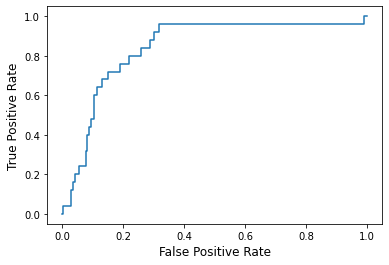

In [22]:
import matplotlib.pyplot as plt

i = 0

X_test = Stroke_Data_BMI_Replace_Nulls_test.drop(columns = ['stroke'])
Y_test = Stroke_Data_BMI_Replace_Nulls_test['stroke']
X_train = Stroke_Data_BMI_Replace_Nulls_train.drop(columns = ['stroke'])
Y_train = Stroke_Data_BMI_Replace_Nulls_train['stroke']


model = linear_model.LogisticRegression(**parameters_LR[i]).fit(X_train, Y_train)
fpr, tpr, threshold = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
print(roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
model_plot = plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', size = 12)
plt.ylabel('True Positive Rate', size = 12)



In [23]:
performance = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold': threshold})

In [24]:
performance

,fpr,tpr,threshold
0,0.000000,0.00,1.366228
1,0.002058,0.00,0.366228
2,0.002058,0.04,0.308417
3,0.026749,0.04,0.214963
4,0.026749,0.12,0.199771
5,0.034979,0.12,0.186771
6,0.034979,0.16,0.185631
7,0.041152,0.16,0.180067
8,0.041152,0.20,0.174852
9,0.055556,0.20,0.163032
